In [1]:
!wget -nc https://combineresearch.com/datasets/csv/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [6]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df['LogPassengers'] = np.log(df['Passengers'])

In [8]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [9]:
import pmdarima as pm

In [10]:
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      Seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=5.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=1.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=1.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.37 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=4.48 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.46 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.38 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.32 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.60 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.17 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.42 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 22 Aug 2022   AIC                            905.686
Time:                                    15:56:23   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

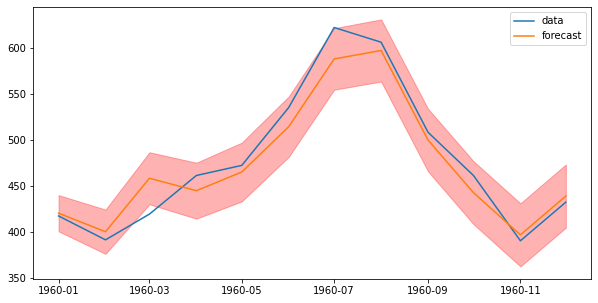

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

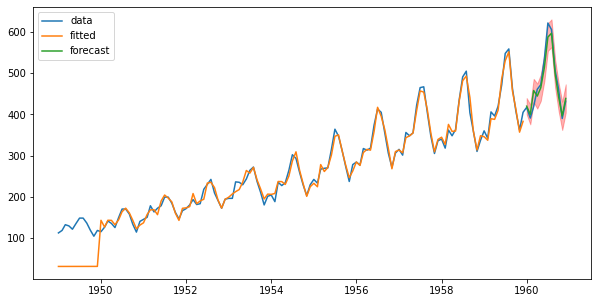

In [14]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:, 0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [15]:
logmodel = pm.auto_arima(train['LogPassengers'],
                         trace=True,
                         suppress_warnings=True,
                         seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.061, Time=5.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.80 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.328, Time=2.01 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.782, Time=0.77 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.330, Time=4.47 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=3.54 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=4.66 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-444.872, Time=1.24 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.47 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.440, Time=2.15 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.327, Time=3.38 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [16]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Mon, 22 Aug 2022   AIC                           -448.052
Time:                                      15:58:10   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.160      0.031       0.002       0.037
ar.L1          0.6000      0.083      7.266      0.000       0.438       0.762
ar.L2          0.2414      0.085      2.848      0.004       0.075       0.408
ma.S.L12      -0.5677      0.105     -5.423      0.000      -0.773      -0.362
sigma2         0.0012      0.000      8.190      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.10
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

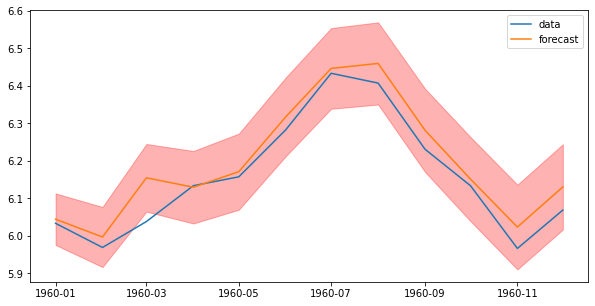

In [17]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

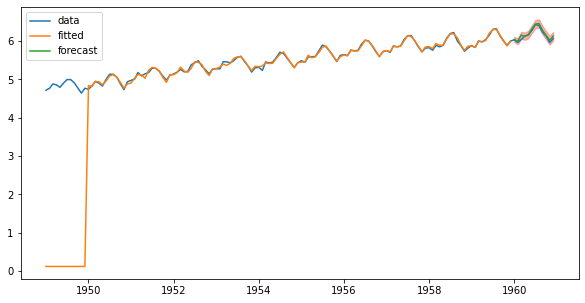

In [18]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [19]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [20]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.53646865137419
Logged RMSE: 23.072023175905514


In [21]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=True,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-222.099, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-217.708, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-215.917, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-228.902, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-217.540, T

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.565
Date:                Mon, 22 Aug 2022   AIC                           -251.131
Time:                        15:58:32   BIC                           -228.129
Sample:                    01-01-1949   HQIC                          -241.784
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0099      0.002      5.450      0.000       0.006       0.013
ar.L1          0.0665      0.126      0.527      0.599      -0.181       0.314
ar.L2          0.4565      0.121      3.773      0.000       0.219       0.694
ar.L3         -0.2561      0.100     -2.563      0.010      -0.452      -0.060
ar.L4         -0.2263      0.103     -2.207      0.027      -0.427      -0.025
ma.L1         -0.0560      0.086     -0.647      0.517      -0.225       0.114
ma.L2         -0.8628      0.085    -10.159      0.000      -1.029      -0.696
sigma2         0.0074      0.001      5.588      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.01
Prob(Q):                              0.82   Prob(JB):                         0.05
Heteroskedasticity (H):               1.04   Skew:                             0.22
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

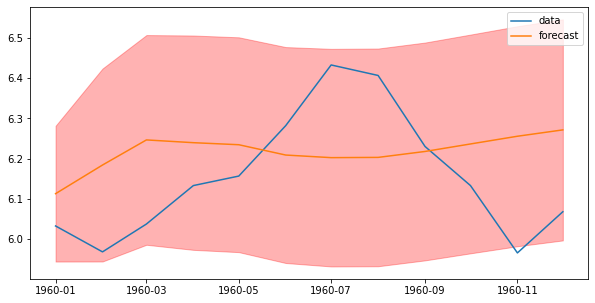

In [23]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

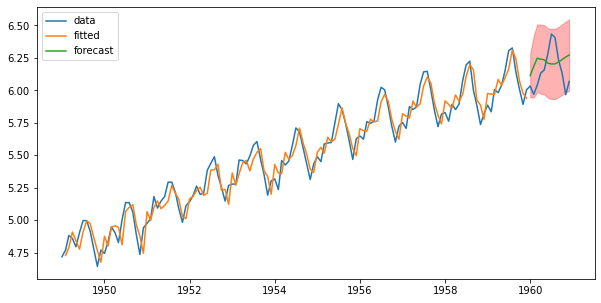

In [25]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [26]:
rmse(test['Passengers'], np.exp(test_pred))

83.23824475328247